In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
from geoana.em.static import ElectrostaticSphere

In [8]:
W = 100
R = 20  # @param
sigma0 = 0.01  # @param
sigma1 = 0.1  # @param
E0 = 1 # @param
N = 50  # @param

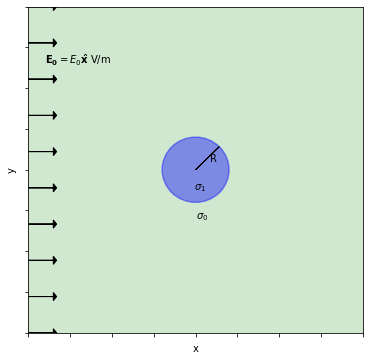

In [9]:
fig, ax = plt.subplots(1,1, figsize = (6,6))

circle = patches.Circle([0,0],radius=R, alpha=0.4, color='blue', linewidth=1.5)
ax.add_patch(circle)
ax.arrow(0., 0., np.sqrt(2.)*R/2., np.sqrt(2.)*R/2., head_width=0., head_length=0.)

for y in np.linspace(-W, W, 10):
    ax.arrow(-W, y, 0.15*W, 0.0, head_width=5., head_length=2., color='k')

ax.text(-1., -np.sqrt(R)/2.-10., '$\\sigma_1$')
ax.text(-0.05, -R-10, '$\\sigma_0$')
ax.text(0.5*np.cos(np.pi/6)*R, 0.5*np.sin(np.pi/6)*R, 'R')
ax.text(-1.8*W/2, 1.3*W/2, '$\\mathbf{E_0} = E_0 \\mathbf{\\hat{x}}$ V/m')

ax.set_facecolor([0.4, 0.7, 0.4, 0.3])
ax.set_xlim([-W, W])
ax.set_ylim([-W, W])
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

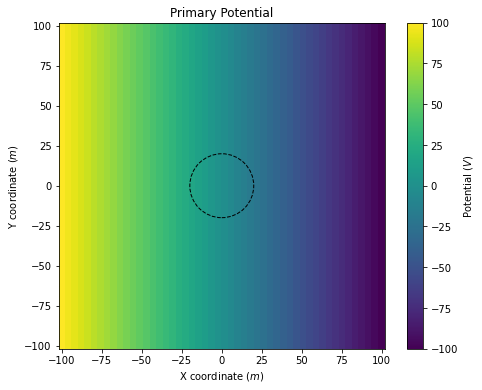

In [10]:
sig0 = sigma0         # conductivity of the whole-space in S/m
sig1 = sigma1         # conductivity of the sphere in S/m

sphere = ElectrostaticSphere(R, sig1, sig0, E0) # create the sphere object

xr = np.linspace(-W, W, N) # X-axis discretization
yr = xr.copy()      # Y-axis discretization
X, Y = np.meshgrid(xr, yr)
Z = np.zeros_like(X)

potentials = sphere.potential((X, Y, Z), field='primary')

fig, ax = plt.subplots(1,1, figsize = (8,6))
im = ax.pcolor(X, Y, potentials, shading='auto')
cb = plt.colorbar(im)
cb.set_label(label='Potential ($V$)')
ax.add_patch(patches.Circle([0,0], R, fill=False, linestyle='--'))

ax.set_title('Primary Potential')
ax.set_ylabel('Y coordinate ($m$)')
ax.set_xlabel('X coordinate ($m$)')
ax.set_aspect('equal')

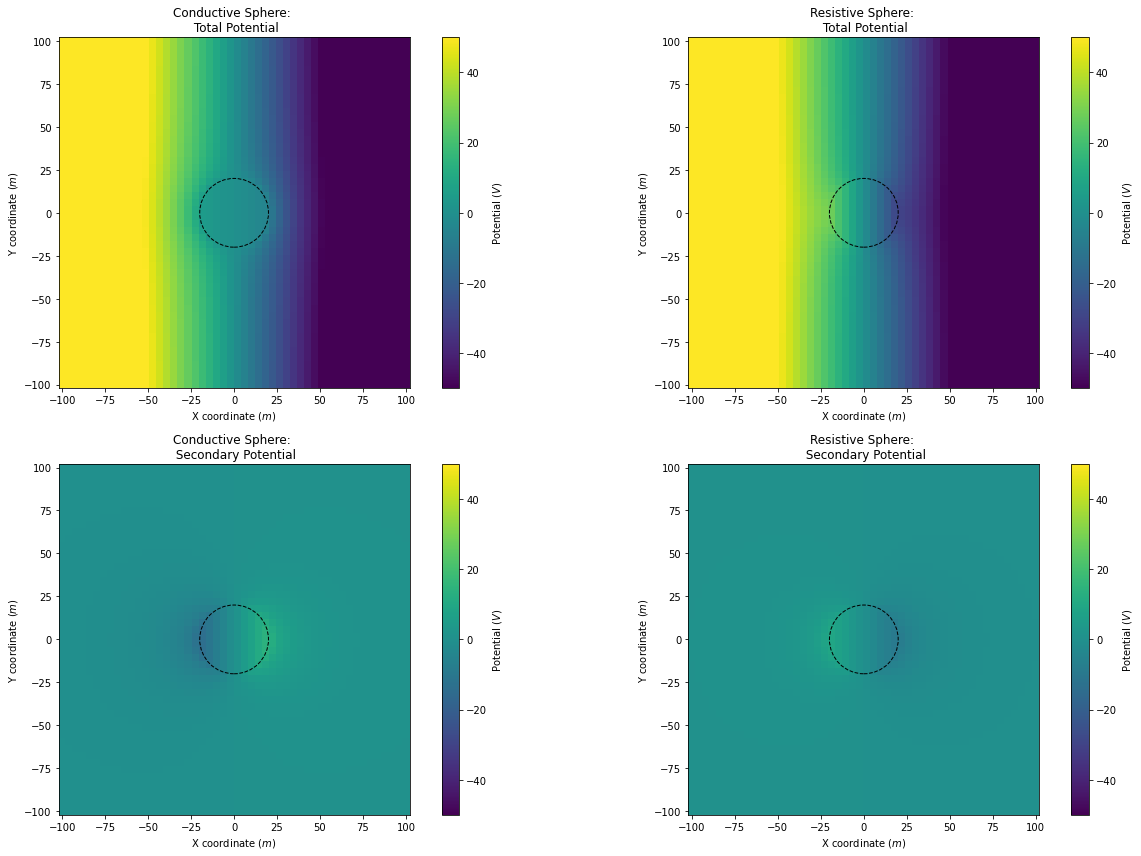

In [26]:
sig0 = sigma0          # conductivity of the whole-space in S/m
sig1 = sigma1         # conductivity of the sphere in S/m
sigma2 = 10.**-5. # @param
sig2 = sigma2

sphere1 = ElectrostaticSphere(R, sig1, sig0, E0) # create the sphere object
sphere2 = ElectrostaticSphere(R, sig2, sig0, E0) # create the sphere object

xr = np.linspace(-W, W, N) # X-axis discretization
yr = xr.copy()      # Y-axis discretization
X, Y = np.meshgrid(xr, yr)
Z = np.zeros_like(X)

Vt1, Vp1, Vs1 = sphere1.potential((X, Y, Z), field='all')
Vt2, Vp2, Vs2 = sphere2.potential((X, Y, Z), field='all')

fig, axs = plt.subplots(2,2,figsize=(18,12))
for ax, V, title in zip(
    axs.flatten(),
    [Vt1, Vt2, Vs1, Vs2],
    [
      'Conductive Sphere: \n Total Potential',
      'Resistive Sphere: \n Total Potential',
      'Conductive Sphere: \n Secondary Potential',
      'Resistive Sphere: \n Secondary Potential',
    ]
):
    im = ax.pcolor(X, Y, V, shading='auto')
    im.set_clim([-50, 50])
    cb = plt.colorbar(im, ax=ax)
    cb.set_label(label='Potential ($V$)')
    ax.add_patch(patches.Circle([0,0], R, fill=False, linestyle='--'))

    ax.set_title(title)
    ax.set_ylabel('Y coordinate ($m$)')
    ax.set_xlabel('X coordinate ($m$)')
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

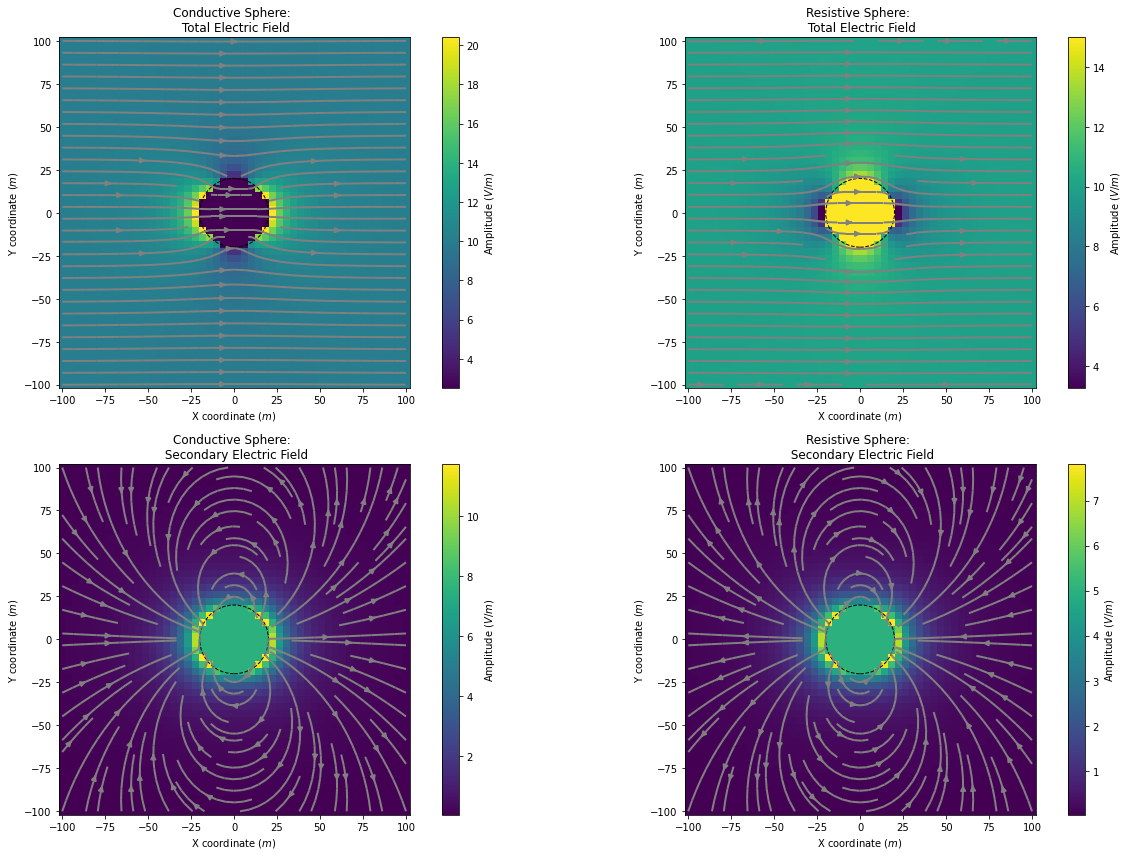

In [38]:
sig0 = sigma0          # conductivity of the whole-space in S/m
sig1 = sigma1         # conductivity of the sphere in S/m
sig2 = sigma2         # conductivity of the sphere in S/m

sphere1 = ElectrostaticSphere(R, sig1, sig0, E0) # create the sphere object
sphere2 = ElectrostaticSphere(R, sig2, sig0, E0) # create the sphere object

xr = np.linspace(-W, W, N) # X-axis discretization
yr = xr.copy()      # Y-axis discretization
X, Y = np.meshgrid(xr, yr)
Z = np.zeros_like(X)

Et1, Ep1, Es1 = sphere1.electric_field((X, Y, Z), field='all')
Et2, Ep2, Es2 = sphere2.electric_field((X, Y, Z), field='all')

fig, axs = plt.subplots(2,2,figsize=(18,12))
Es = [Et1, Et2, Es1, Es2]
titles = [
    'Conductive Sphere: \n Total Electric Field',
    'Resistive Sphere: \n Total Electric Field',
    'Conductive Sphere: \n Secondary Electric Field',
    'Resistive Sphere: \n Secondary Electric Field',
]
for ax, E, title in zip(axs.flatten(), Es, titles):
    E_amp = np.linalg.norm(E, axis=-1)
    im = ax.pcolor(X, Y, E_amp, shading='auto')
    cb = plt.colorbar(im, ax=ax)
    cb.set_label(label= 'Amplitude ($V/m$)')
    ax.streamplot(X, Y, E[..., 0], E[..., 1], color='gray', linewidth=2., density=1)
    ax.add_patch(patches.Circle([0,0], R, fill=False, linestyle='--'))

    ax.set_ylabel('Y coordinate ($m$)')
    ax.set_xlabel('X coordinate ($m$)')
    ax.set_aspect('equal')
    ax.set_title(title)

plt.tight_layout()
plt.show()